<a href="https://colab.research.google.com/github/aditya-mishra25/Melanoma_Detection_CNN/blob/main/Aditya_Mishra_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [107]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [108]:
### Mounting Drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
## If you are using the data by mounting the google drive, use the following :
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN/Test')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [110]:
### Defining the path for train and test images
### Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(data_dir_train)
data_dir_test = pathlib.Path(data_dir_test)
### Testing if the data is read properly and checking the number o 

In [111]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [112]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [113]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [114]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [115]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

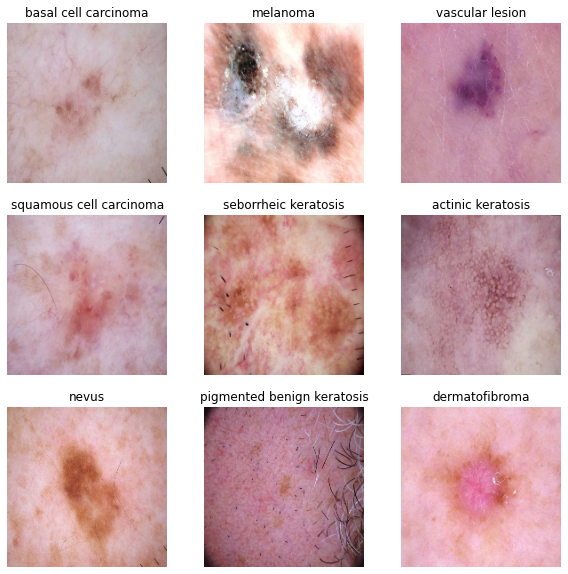

In [116]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
seen = []
image_count = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(10):
  for i in range(batch_size):
    if class_names[labels[i]] not in seen:
      seen.append(class_names[labels[i]])
      ax=plt.subplot(3,3,image_count+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")
      image_count+=1
  if len(seen)>9:
    break
      

In [35]:
len(np.concatenate([i for x, i in train_ds], axis=0))

1792

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [117]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [118]:
### Your code goes here
model = keras.Sequential([
                          tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # 3 because it is an RGB layer
                          layers.Conv2D(16 , 3, padding="same", activation="relu"),
                          layers.MaxPooling2D(),
                          layers.Conv2D(32, 3, padding="same", activation="relu"),
                          layers.MaxPooling2D(),
                          layers.Conv2D(64, 3, padding="same", activation="relu"),
                          layers.MaxPooling2D(),
                          layers.Flatten(),
                          layers.Dense(128, activation="relu"),
                          layers.LeakyReLU(256),
                          # layers.Dense(32, activation="relu"),
                          layers.Dense(len(class_names))
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [119]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [120]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [63]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 65ms/step - loss: 2.0281 - accuracy: 0.2467 - val_loss: 1.8247 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6225 - accuracy: 0.4275 - val_loss: 1.5088 - val_accuracy: 0.4944
Epoch 3/20
56/56 [==============================] - 3s 61ms/step - loss: 1.4083 - accuracy: 0.5084 - val_loss: 1.5182 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 1.3207 - accuracy: 0.5391 - val_loss: 1.4905 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.2057 - accuracy: 0.5653 - val_loss: 1.4590 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 4s 65ms/step - loss: 1.1347 - accuracy: 0.5993 - val_loss: 1.4646 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 3s 62ms/step - loss: 1.0534 - accuracy: 0.6211 - val_loss: 1.4561 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing training results

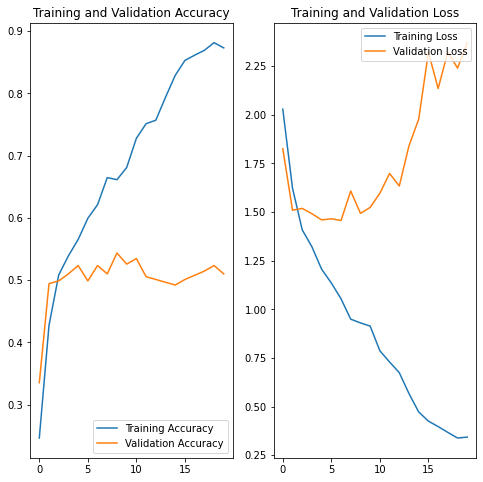

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit </br>


* we see that the accuracy has been increasing for the training set till 0.87 , however, the validation Accuracy is going up and down in between 0.5 and 0.55.</br>

* In the second Graph, we see the loss has gone up significantly for val set where for training set the loss is coming down which is the ideal pattern we want to see.

In [121]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1),
    ]
)

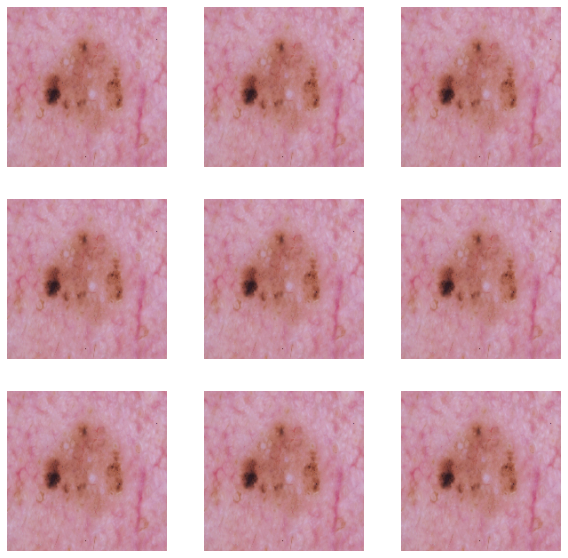

In [122]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [73]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = 9
model = Sequential([                     
                    data_augmentation,
                    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # 3 because it is an RGB layer
                    layers.Conv2D(16 , 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.3),
                    layers.Flatten(),
                    layers.Dense(128, activation="relu"),
                    layers.LeakyReLU(256),
                    # layers.Dense(32, activation="relu"),
                    layers.Dense(len(class_names)),
                    layers.Dropout(0.2)

])

### Compiling the model

In [74]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [75]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 5s 73ms/step - loss: 2.0456 - accuracy: 0.2450 - val_loss: 1.8549 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 4s 70ms/step - loss: 1.8122 - accuracy: 0.3499 - val_loss: 1.7292 - val_accuracy: 0.3669
Epoch 3/20
56/56 [==============================] - 4s 70ms/step - loss: 1.7285 - accuracy: 0.3845 - val_loss: 1.6518 - val_accuracy: 0.4183
Epoch 4/20
56/56 [==============================] - 4s 70ms/step - loss: 1.6415 - accuracy: 0.4208 - val_loss: 1.4491 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 4s 70ms/step - loss: 1.6075 - accuracy: 0.4263 - val_loss: 1.4892 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 4s 70ms/step - loss: 1.5416 - accuracy: 0.4353 - val_loss: 1.4341 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 4s 70ms/step - loss: 1.5864 - accuracy: 0.4314 - val_loss: 1.4283 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing the results

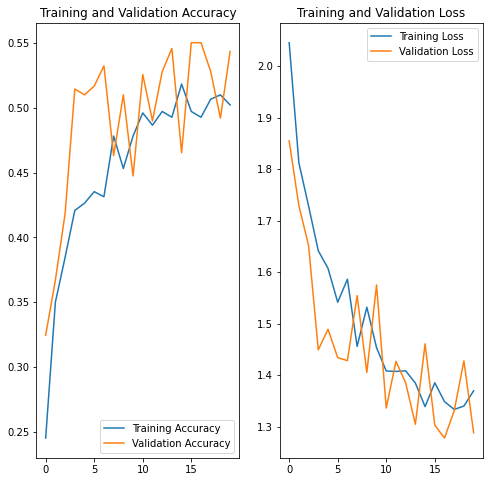

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

* Here we observe that the problem of overfitting is solved, but still our accuries are too low for us to rely on. this is caused due to the class imbalance problem.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

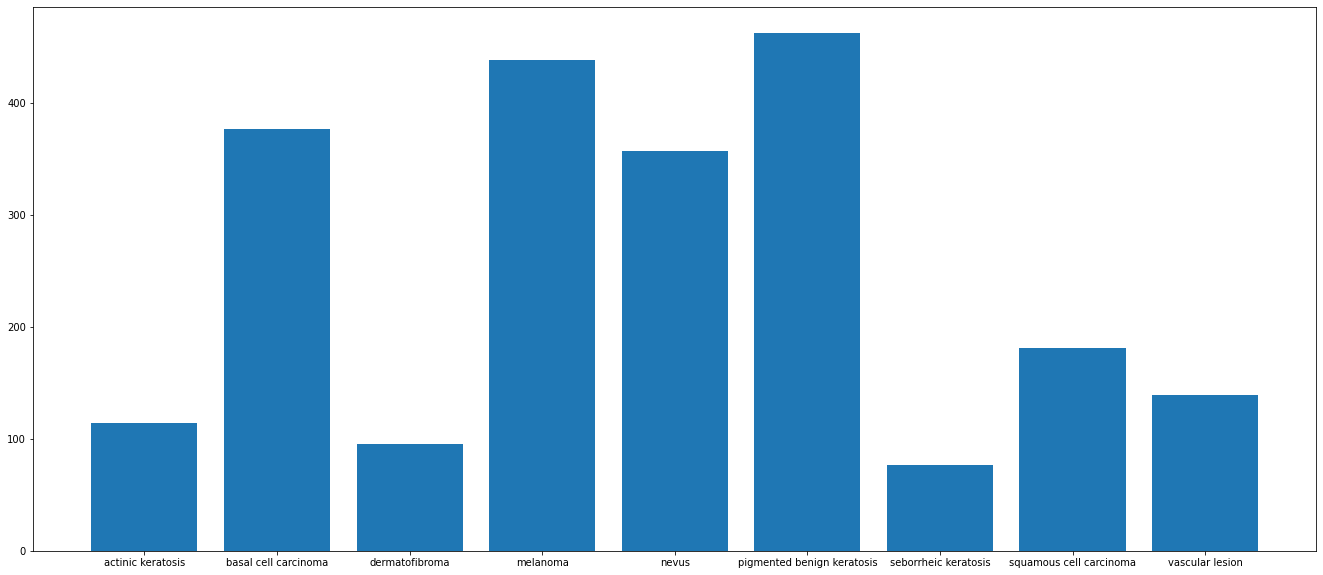

In [123]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

seen=[]
for i in class_names:
    seen.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(23,10))
plt.bar(class_names,seen)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [78]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [82]:
path_to_training_dataset="/content/drive/MyDrive/CNN/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFE0946390>: 100%|██████████| 500/500 [00:23<00:00, 20.96 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEFDC136790>: 100%|██████████| 500/500 [00:22<00:00, 22.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFE44C2C50>: 100%|██████████| 500/500 [00:23<00:00, 21.71 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEFDC130990>: 100%|██████████| 500/500 [01:45<00:00,  4.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FEFDC13D450>: 100%|██████████| 500/500 [01:39<00:00,  5.00 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEFDC235DD0>: 100%|██████████| 500/500 [00:23<00:00, 20.86 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FEFE0977190>: 100%|██████████| 500/500 [00:51<00:00,  9.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEFE44D0A50>: 100%|██████████| 500/500 [00:22<00:00, 22.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFE43416D0>: 100%|██████████| 500/500 [00:22<00:00, 21.92 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [83]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [88]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_70f6f2f9-dfc8-45fe-878b-c734ce2a1750.jpg',
 '/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029210.jpg_a48f1d26-4973-4243-98ed-dd03d863450f.jpg',
 '/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_1db24f18-f022-4fce-b90b-543853f4b9c9.jpg',
 '/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031430.jpg_fcd0e988-081d-40e3-9a0c-52a38a01eb4d.jpg',
 '/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_824e5f97-c03b-454e-8160-2a4fb5032b78.jpg',
 '/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030586.jpg_8cdbc54c-485b-462c-a7d7-80ce83f2887a.jpg',
 '/content/drive/MyDrive/CNN/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031292.jpg_753e95a7-0807-

In [89]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [91]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [92]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [93]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [94]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [97]:
data_dir_train="/content/drive/MyDrive/CNN/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [100]:
## your code goes here
num_classes = 9
model = Sequential([                     
                    data_augmentation,
                    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

                    layers.Conv2D(64, 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),

                    layers.Conv2D(128, 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),

                    layers.Conv2D(128, 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),

                    layers.Conv2D(64, 3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),

                    layers.Normalization(axis=None),

                    layers.Dropout(0.35),

                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)

])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [101]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [103]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 49s 271ms/step - loss: 1.8859 - accuracy: 0.2726 - val_loss: 1.5942 - val_accuracy: 0.4031
Epoch 2/30
169/169 [==============================] - 47s 267ms/step - loss: 1.5834 - accuracy: 0.3973 - val_loss: 1.5074 - val_accuracy: 0.4276
Epoch 3/30
169/169 [==============================] - 45s 258ms/step - loss: 1.4645 - accuracy: 0.4377 - val_loss: 1.3716 - val_accuracy: 0.4699
Epoch 4/30
169/169 [==============================] - 45s 259ms/step - loss: 1.3849 - accuracy: 0.4635 - val_loss: 1.3261 - val_accuracy: 0.4907
Epoch 5/30
169/169 [==============================] - 44s 253ms/step - loss: 1.3437 - accuracy: 0.4868 - val_loss: 1.3633 - val_accuracy: 0.4989
Epoch 6/30
169/169 [==============================] - 45s 258ms/step - loss: 1.2966 - accuracy: 0.4974 - val_loss: 1.3295 - val_accuracy: 0.4944
Epoch 7/30
169/169 [==============================] - 44s 255ms/step - loss: 1.2293 - accuracy: 0.5304 - val_loss: 1.1662 - val_ac

#### **Todo:**  Visualize the model results

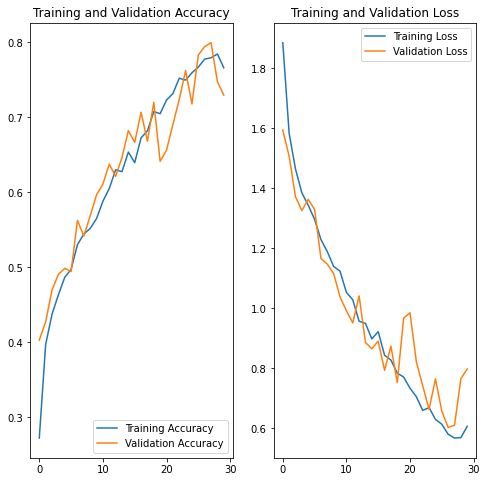

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



* Yes, we did solve the problem of overfitting and underfitting by solving the class imbalance problem.
* the training and validation accuracy both of them are going upwards.
* the loss calculated in each epoch for train and val set seem to be in line and reducing.
* we can further improve the acuuracies by increasing the number of epochs, but it will become computationally heavy.